<a href="https://colab.research.google.com/github/rajsaumyaa/ML_labs/blob/main/exp4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = datasets.fetch_california_housing()
print(df.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

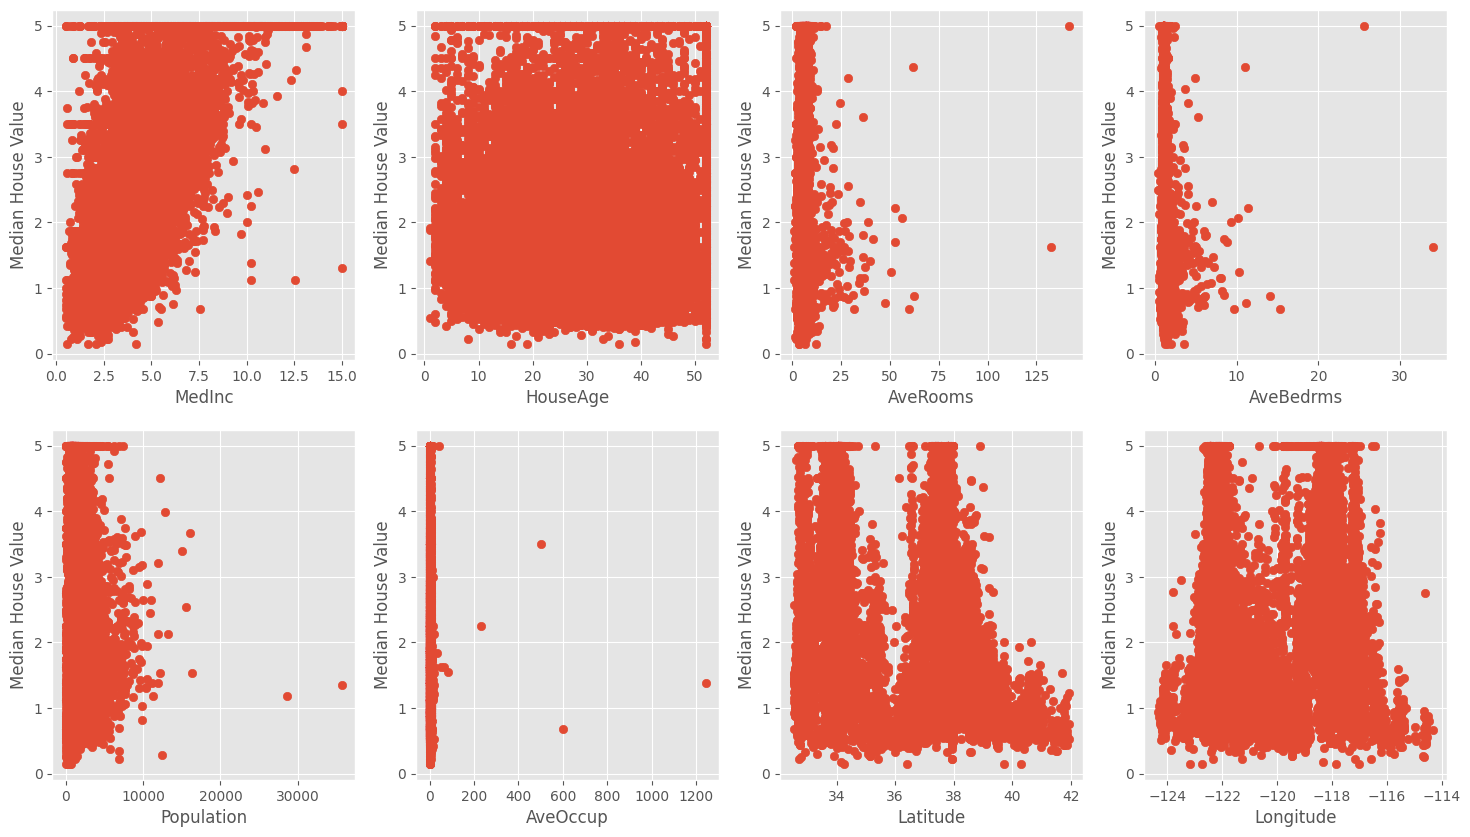

In [3]:
plt.style.use('ggplot')
fig = plt.figure(figsize = (18, 10))

for index, feature_name in enumerate(df.feature_names):
	ax = fig.add_subplot(2, 4, index + 1)
	ax.scatter(df.data[:, index], df.target)
	ax.set_ylabel('Median House Value', size = 12)
	ax.set_xlabel(feature_name, size = 12)

plt.show()

In [4]:
df2 = pd.DataFrame(df.data)
df2.columns = df.feature_names
df_target = np.asarray(df.target)
df2['House Price'] = pd.Series(df_target)

# input
X = df2.iloc[:, :-1]

#output
Y = df2.iloc[:, -1]

print(df2.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  House Price  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [5]:
x_train, x_test, y_train, y_test = train_test_split(
	df2.iloc[:, :-1], df2.iloc[:, -1],
	test_size = 0.25)

In [6]:
# Apply multiple Linear Regression Model
lreg = LinearRegression()
lreg.fit(x_train, y_train)

# Generate Prediction on test set
y_pred = lreg.predict(x_test)

# calculating Mean Squared Error (mse)
mean_squared_error = np.mean((y_pred - y_test)**2)
print("Mean squared Error on test set : ", mean_squared_error)

# Putting together the coefficient and their corresponding variable names
lreg_coeff = pd.DataFrame()
lreg_coeff["Columns"] = x_train.columns
lreg_coeff['Coefficient Estimate'] = pd.Series(lreg.coef_)
print(lreg_coeff)

Mean squared Error on test set :  0.5367769851374954
      Columns  Coefficient Estimate
0      MedInc              0.442440
1    HouseAge              0.009370
2    AveRooms             -0.118554
3   AveBedrms              0.743588
4  Population             -0.000003
5    AveOccup             -0.007808
6    Latitude             -0.425533
7   Longitude             -0.439786


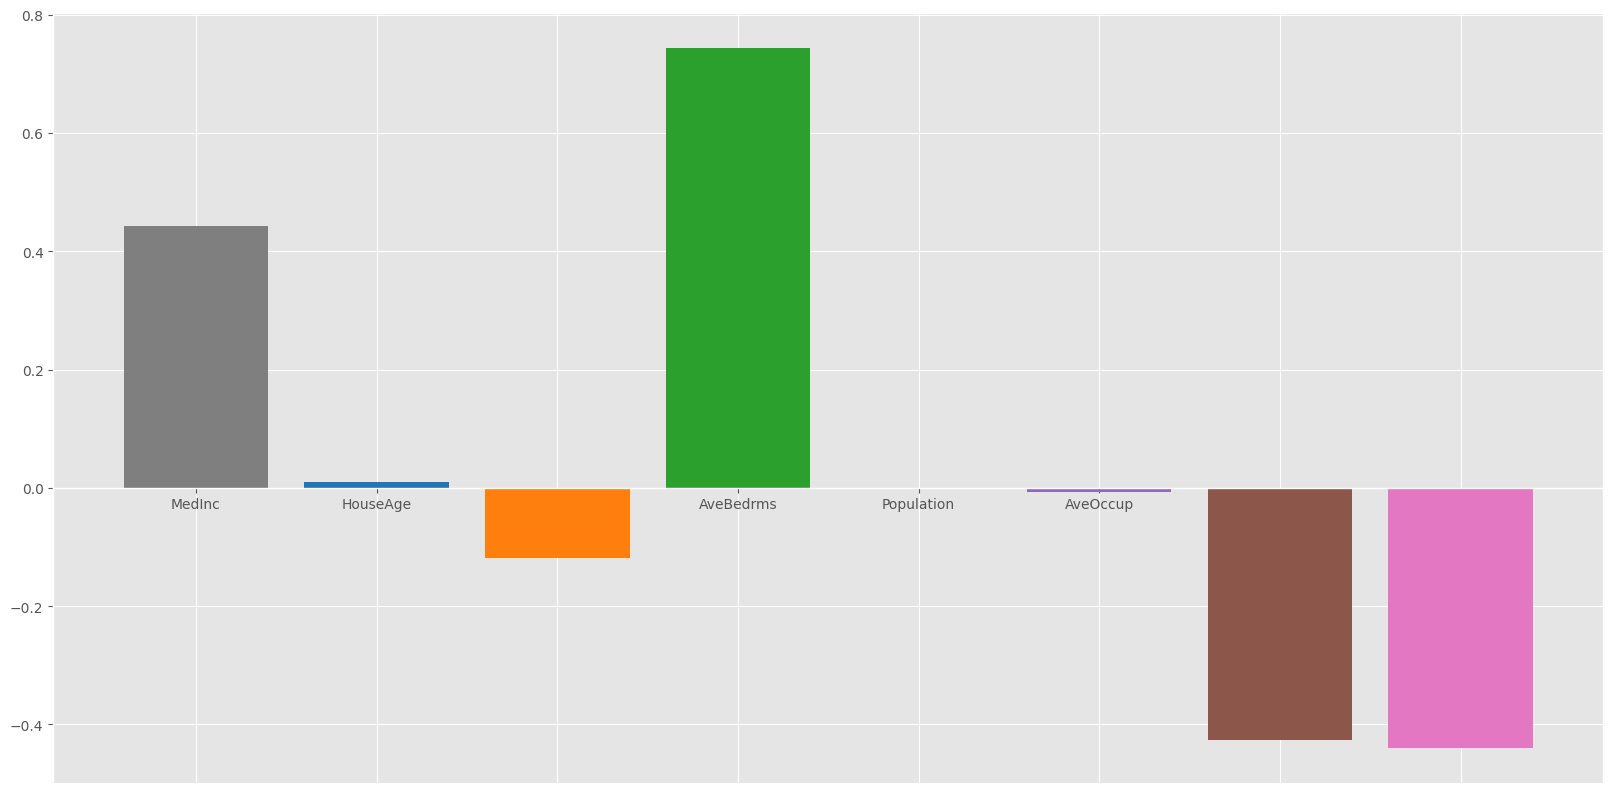

In [7]:
# plotting the coefficient score
fig, ax = plt.subplots(figsize =(20, 10))

color =['tab:gray', 'tab:blue', 'tab:orange',
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
'tab:pink']

ax.bar(lreg_coeff["Columns"],
lreg_coeff['Coefficient Estimate'],
color = color)

ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot')
plt.show()

In [8]:
# import ridge regression from sklearn library
from sklearn.linear_model import Ridge

# Train the model
ridgeR = Ridge(alpha = 1)
ridgeR.fit(x_train, y_train)
ridge_y_pred = ridgeR.predict(x_test)

# calculate mean square error
mean_squared_error_ridge = np.mean((ridge_y_pred - y_test)**2)
print(mean_squared_error_ridge)

# get ridge coefficient and print them
ridge_coeff = pd.DataFrame()
ridge_coeff["Columns"]= x_train.columns
ridge_coeff['Coefficient Estimate'] = pd.Series(ridgeR.coef_)
print(ridge_coeff)

0.5367302567506304
      Columns  Coefficient Estimate
0      MedInc              0.442279
1    HouseAge              0.009372
2    AveRooms             -0.118248
3   AveBedrms              0.741891
4  Population             -0.000003
5    AveOccup             -0.007808
6    Latitude             -0.425520
7   Longitude             -0.439752


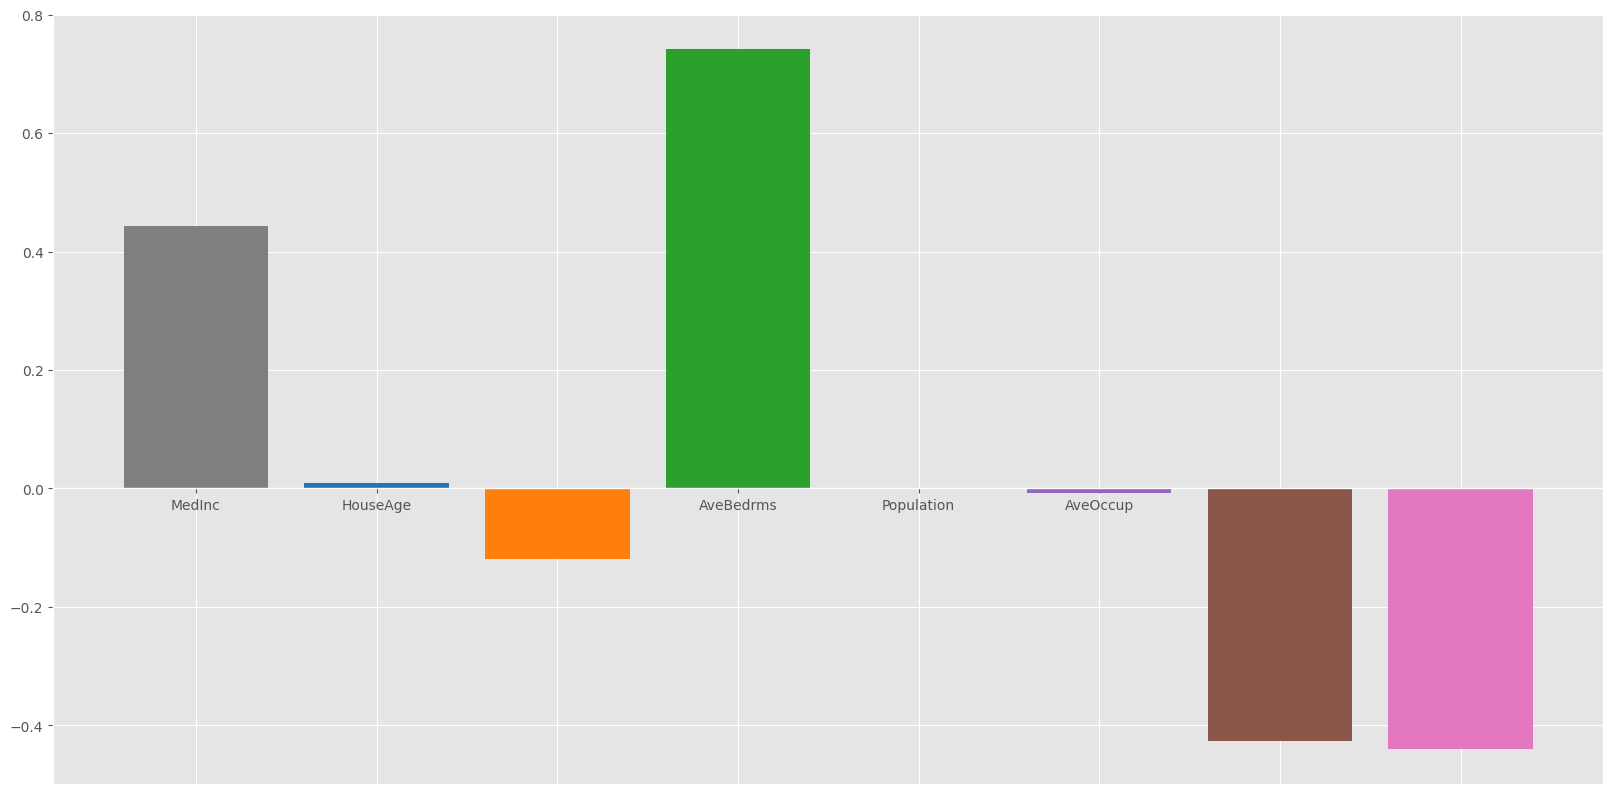

In [9]:
# plotting the coefficient score
fig, ax = plt.subplots(figsize =(20, 10))

color =['tab:gray', 'tab:blue', 'tab:orange',
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
'tab:pink']

ax.bar(ridge_coeff["Columns"],
ridge_coeff['Coefficient Estimate'],
color = color)

ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot')
plt.show()

In [10]:
# import Lasso regression from sklearn library
from sklearn.linear_model import Lasso

# Train the model
lasso = Lasso(alpha = 0.5)
lasso.fit(x_train, y_train)
y_pred1 = lasso.predict(x_test)

# Calculate Mean Squared Error
mean_squared_error = np.mean((y_pred1 - y_test)**2)
print("Mean squared error on test set", mean_squared_error)
lasso_coeff = pd.DataFrame()
lasso_coeff["Columns"] = x_train.columns
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_)

print(lasso_coeff)

Mean squared error on test set 0.7124166965539206
      Columns  Coefficient Estimate
0      MedInc              0.288612
1    HouseAge              0.011966
2    AveRooms              0.000000
3   AveBedrms             -0.000000
4  Population              0.000015
5    AveOccup             -0.000000
6    Latitude             -0.000000
7   Longitude             -0.000000


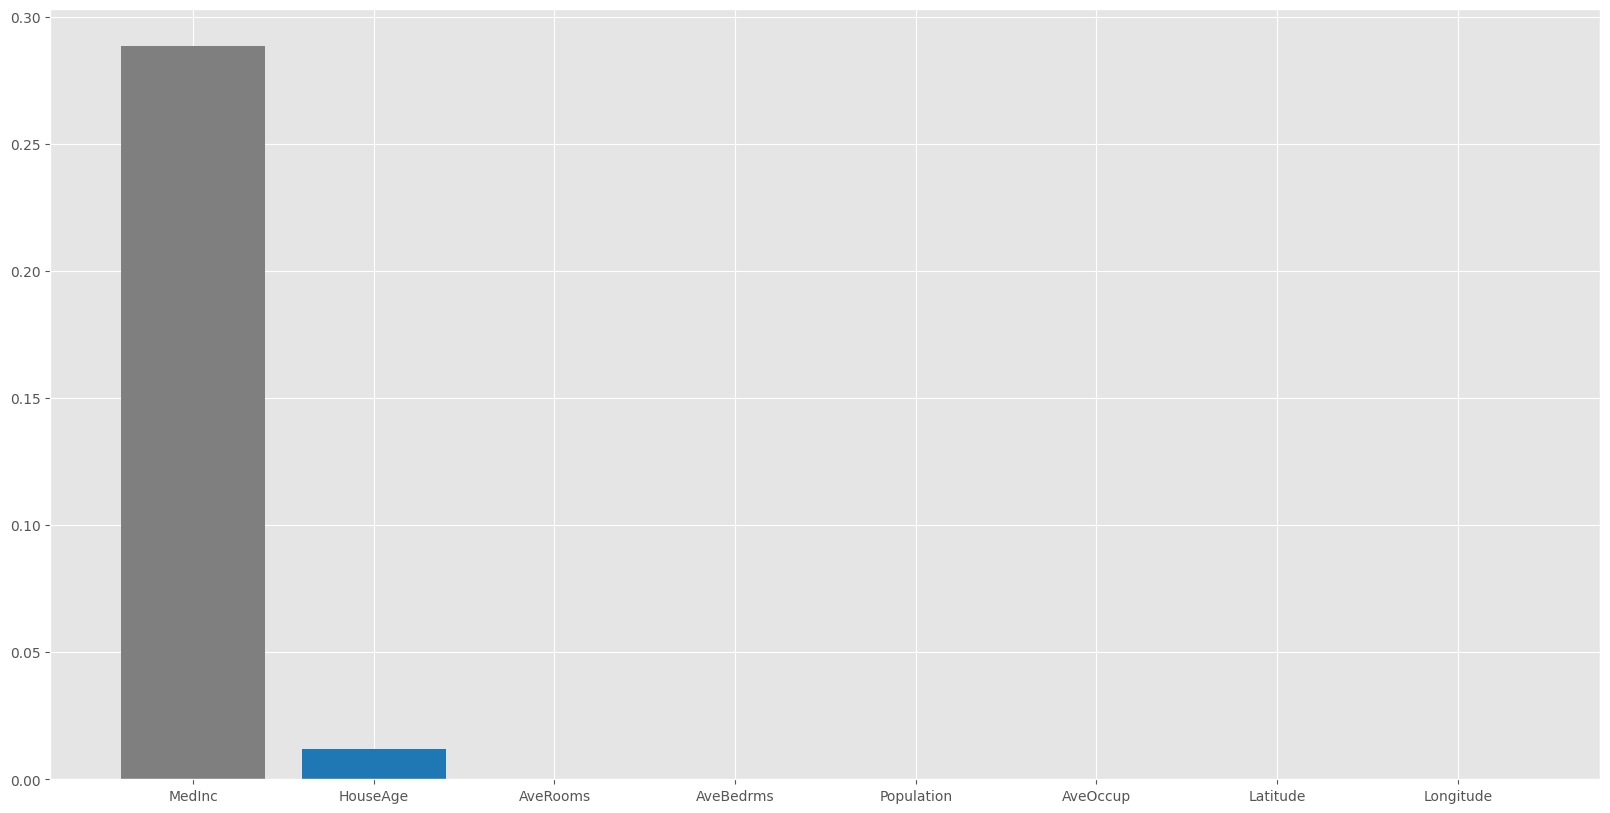

In [11]:
# plotting the coefficient score
fig, ax = plt.subplots(figsize =(20, 10))

color =['tab:gray', 'tab:blue', 'tab:orange',
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
'tab:pink']

ax.bar(lasso_coeff["Columns"],
lasso_coeff['Coefficient Estimate'],
color = color)

ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot')
plt.show()

In [12]:
# import model
from sklearn.linear_model import ElasticNet

# Train the model
e_net = ElasticNet(alpha = 0.5)
e_net.fit(x_train, y_train)

# calculate the prediction and mean square error
y_pred_elastic = e_net.predict(x_test)
mean_squared_error = np.mean((y_pred_elastic - y_test)**2)
print("Mean Squared Error on test set", mean_squared_error)

e_net_coeff = pd.DataFrame()
e_net_coeff["Columns"] = x_train.columns
e_net_coeff['Coefficient Estimate'] = pd.Series(e_net.coef_)
e_net_coeff

Mean Squared Error on test set 0.667729448247385


,Columns,Coefficient Estimate
0,MedInc,0.336574
1,HouseAge,0.014694
2,AveRooms,-0.000000
3,AveBedrms,0.000000
4,Population,0.000024
5,AveOccup,-0.002027
6,Latitude,-0.000000
7,Longitude,-0.000000


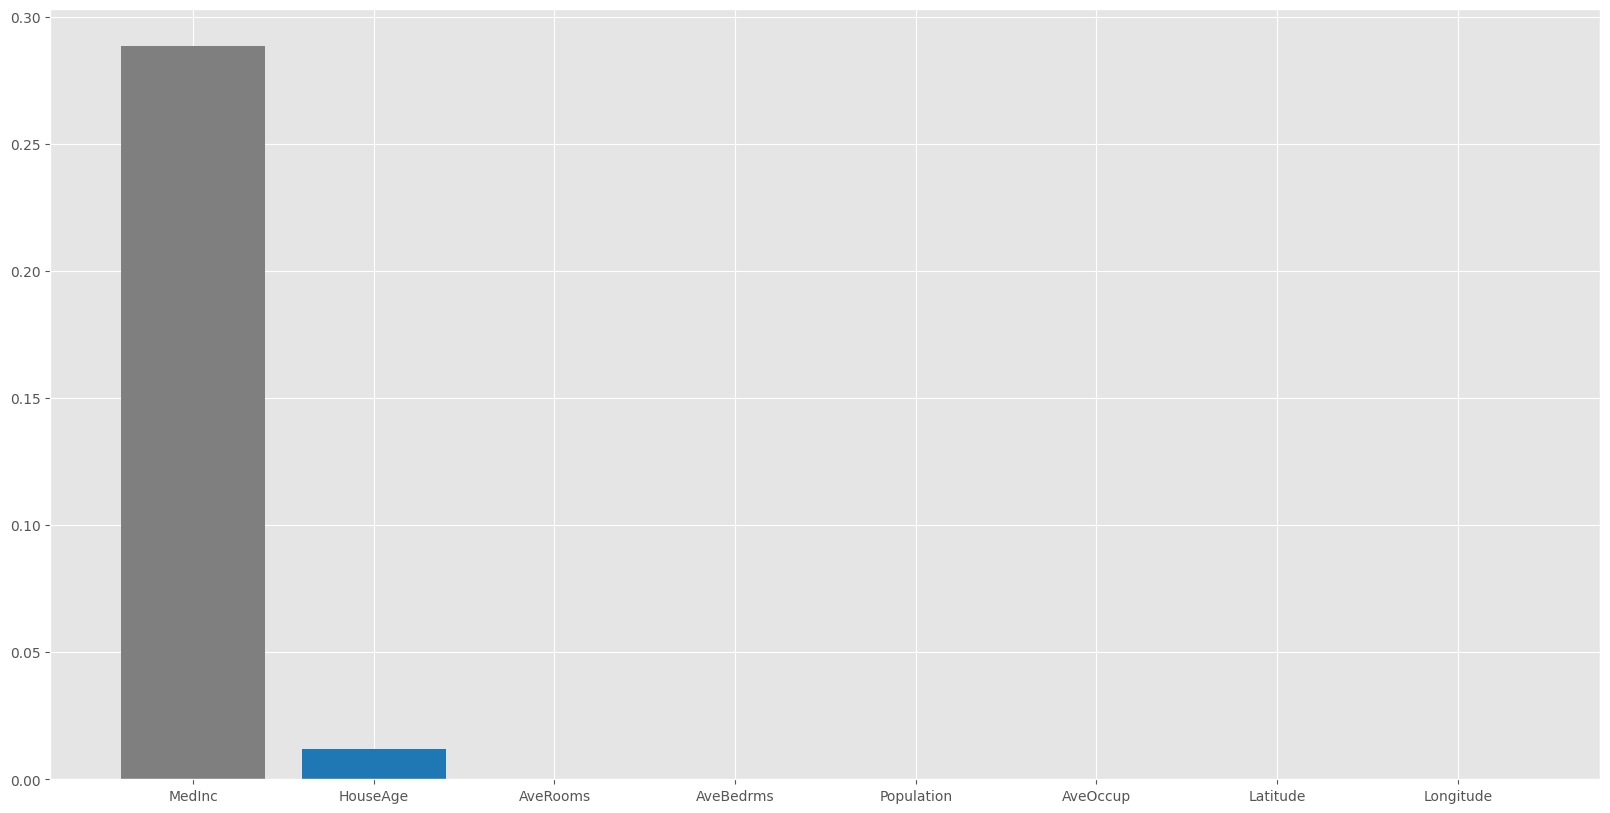

In [13]:
# plotting the coefficient score
fig, ax = plt.subplots(figsize =(20, 10))

color =['tab:gray', 'tab:blue', 'tab:orange',
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
'tab:pink']

ax.bar(lasso_coeff["Columns"],
lasso_coeff['Coefficient Estimate'],
color = color)

ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot')
plt.show()